# Southern Ocean Thermocline Ventilation

In this notebook, we plot the Southern Ocean thermocline ventilation tracers as described in this paper:

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JC011680

### Import modules

In [1]:
# import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.cm as cmx
import matplotlib as mpl
# for label map
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# pyxpcm, xarray, dask
import numpy as np
import xarray as xr

### Load data

In [2]:
df = xr.open_dataset('expose_tracer_histograms.nc', decode_times=False)
df

<xarray.Dataset>
Dimensions:            (ncoord: 2, nlat: 320, nlon: 2160, nsig1: 6, ntracer: 5, time: 438)
Coordinates:
    lat                (nlat, nlon) float64 ...
    lon                (nlat, nlon) float64 ...
    cn                 (ncoord) float64 ...
    tn                 (ntracer) float64 ...
  * time               (time) int32 0 0 0 0 0 0 0 0 ... 35 35 36 36 36 36 36 36
Dimensions without coordinates: ncoord, nlat, nlon, nsig1, ntracer
Data variables:
    sigma1             (nsig1) float64 ...
    tracer_hist        (ntracer, nlat, nlon) float64 ...
    montgomery         (nsig1, nlat, nlon) float64 ...
    release_locations  (ntracer, ncoord) float64 ...
    tracer_com         (ntracer, time, ncoord) float64 ...
Attributes:
    Conventions:          CF-1.6
    History:              Created 16-Mar-2021 14:49:17
    Source:               Compiled and prepared by D.C. Jones (British Antarc...
    Reference paper URL:  https://doi.org/10.1002/2016JC011680

### Thresholding to display tracer distribution

In [3]:
tracer = df.tracer_hist
tracer

<xarray.DataArray 'tracer_hist' (ntracer: 5, nlat: 320, nlon: 2160)>
[3456000 values with dtype=float64]
Coordinates:
    lat      (nlat, nlon) float64 ...
    lon      (nlat, nlon) float64 ...
    tn       (ntracer) float64 1.0 2.0 3.0 4.0 5.0
Dimensions without coordinates: ntracer, nlat, nlon
Attributes:
    long_name:  column-integrated tracer histogram
    units:      unitless (relative to maximum value per tracer)

In [4]:
#tracer_masked = tracer
#for ntrac in range(0,4,1):
#    tracer_masked[ntrac,:,:] = tracer[ntrac,:,:].where(tracer[ntrac,:,:]==0)

#### Issue: some tracer values appear to be missing when read in using Xarray. These values are present when the NetCDF file is read back in using Matlab instead. 

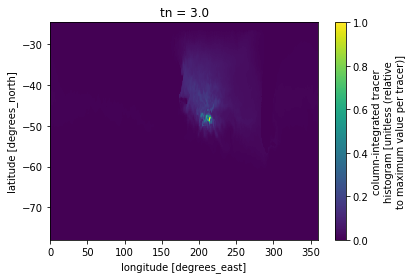

In [5]:
# missing values for some coordinates
df.tracer_hist[2,:,:].plot(x='lon',y='lat')

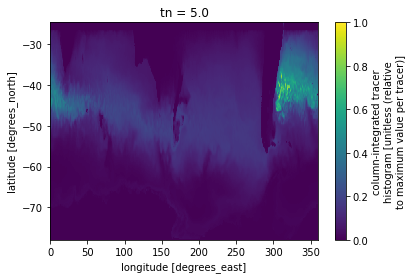

In [6]:
# maximum tracer number works fine
tracer[4,:,:].plot(x='lon',y='lat')

(This has been recorded as an issue)

### Create map plot

In [7]:
#p = tracer[4,:,:].plot(
#    subplot_kws=dict(projection=ccrs.Orthographic(20, -90),facecolor="gray"),
#    transform=ccrs.PlateCarree())

#p.axes.set_global()
#p.axes.coastlines()

In [8]:
#colormap with Historical data
#plt.figure(figsize=(12, 10))
#ax = plt.axes(projection=ccrs.SouthPolarStereo())
#ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
#CS1 = plt.contourf(df.lon,
#                   df.lat,
#                   tracer[4,:,:],
#                   transform=ccrs.PlateCarree()
#                  )
#ax.coastlines(resolution='50m')
#ax.gridlines(color='black')
#ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.OCEAN)

# circular boundary for map
#theta = np.linspace(0, 2*np.pi, 100)
#center, radius = [0.5, 0.5], 0.5
#verts = np.vstack([np.sin(theta), np.cos(theta)]).T
#circle = mpath.Path(verts * radius + center)
#ax.set_boundary(circle, transform=ax.transAxes)